In [131]:
%matplotlib notebook
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
from sklearn import datasets

In [132]:
# import csv
popular_df = pd.read_csv("data/popular_data2.csv",encoding="utf-8")



popular_df.rename(columns = {"Unnamed: 0": 'ID',"nrgy":"energy","dnce":"danceability", "dur":"duration", "pop": "popularity"}, inplace = True)
#popular_df.set_index("ID")
popular_df

,ID,title,artist,top genre,year,bpm,energy,danceability,dB,live,val,duration,acous,spch,popularity
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,599,Find U Again (feat. Camila Cabello),Mark Ronson,dance pop,2019,104,66,61,-7,20,16,176,1,3,75
599,600,Cross Me (feat. Chance the Rapper & PnB Rock),Ed Sheeran,pop,2019,95,79,75,-6,7,61,206,21,12,75
600,601,"No Brainer (feat. Justin Bieber, Chance the Ra...",DJ Khaled,dance pop,2019,136,76,53,-5,9,65,260,7,34,70
601,602,Nothing Breaks Like a Heart (feat. Miley Cyrus),Mark Ronson,dance pop,2019,114,79,60,-6,42,24,217,1,7,69


In [133]:
popular_df.dtypes

ID               int64
title           object
artist          object
top genre       object
year             int64
bpm              int64
energy           int64
danceability     int64
dB               int64
live             int64
val              int64
duration         int64
acous            int64
spch             int64
popularity       int64
dtype: object

In [134]:
popular_yr = popular_df.loc[popular_df["year"] >= 2017]
popular_yr

,ID,title,artist,top genre,year,bpm,energy,danceability,dB,live,val,duration,acous,spch,popularity
443,444,Shape of You,Ed Sheeran,pop,2017,96,65,83,-3,9,93,234,58,8,87
444,445,Closer,The Chainsmokers,electropop,2017,95,52,75,-6,11,66,245,41,3,86
445,446,Starboy,The Weeknd,canadian contemporary r&b,2017,186,59,68,-7,14,49,230,14,28,85
446,447,Treat You Better,Shawn Mendes,canadian pop,2017,83,82,44,-4,11,75,188,11,34,84
447,448,That's What I Like,Bruno Mars,pop,2017,134,56,85,-5,9,86,207,1,4,83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,599,Find U Again (feat. Camila Cabello),Mark Ronson,dance pop,2019,104,66,61,-7,20,16,176,1,3,75
599,600,Cross Me (feat. Chance the Rapper & PnB Rock),Ed Sheeran,pop,2019,95,79,75,-6,7,61,206,21,12,75
600,601,"No Brainer (feat. Justin Bieber, Chance the Ra...",DJ Khaled,dance pop,2019,136,76,53,-5,9,65,260,7,34,70
601,602,Nothing Breaks Like a Heart (feat. Miley Cyrus),Mark Ronson,dance pop,2019,114,79,60,-6,42,24,217,1,7,69


In [135]:
genre = popular_yr["top genre"].value_counts()
genre


top_10 = genre.iloc[0:10]
top_10
    
    

dance pop                    76
pop                          23
canadian pop                  9
electropop                    8
edm                           5
art pop                       3
boy band                      3
latin                         3
canadian contemporary r&b     3
big room                      3
Name: top genre, dtype: int64

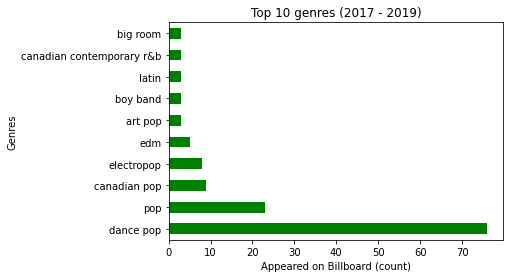

<Figure size 432x288 with 0 Axes>

In [136]:
top_10.plot(kind = "barh", facecolor = "green", title = "Top 10 genres (2017 - 2019)") 
plt.xlabel("Appeared on Billboard (count)")
plt.ylabel("Genres")
plt.savefig('data/top_genres.png')
plt.show()
plt.tight_layout()


In [137]:
artist = popular_yr["artist"].value_counts()
top_artist = artist.iloc[0:10]
top_artist

Shawn Mendes        7
The Chainsmokers    7
Ed Sheeran          7
Maroon 5            5
DNCE                4
Kygo                4
Calvin Harris       4
Cardi B             3
Camila Cabello      3
Liam Payne          3
Name: artist, dtype: int64

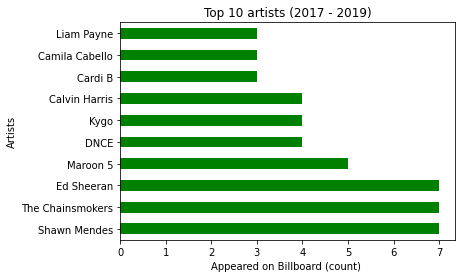

<Figure size 432x288 with 0 Axes>

In [138]:
top_artist.plot(kind = "barh", facecolor = "green", title = "Top 10 artists (2017 - 2019)") 
plt.xlabel("Appeared on Billboard (count) ")
plt.ylabel("Artists")
plt.savefig('data/top_artists.png')
plt.show()
plt.tight_layout()


In [139]:
song = popular_yr["title"].value_counts()
song

Kissing Strangers                        2
First Time                               2
We Don't Talk Anymore - DROELOE Remix    1
Let Me                                   1
Lust for Life (with The Weeknd)          1
                                        ..
Never Be the Same - Radio Edit           1
Tired                                    1
Friends (with BloodPop®)                 1
Love On The Brain                        1
Capital Letters                          1
Name: title, Length: 158, dtype: int64

In [140]:
s = popular_df.loc[popular_df["artist"] == "The Chainsmokers"]
s
top_artist

Shawn Mendes        7
The Chainsmokers    7
Ed Sheeran          7
Maroon 5            5
DNCE                4
Kygo                4
Calvin Harris       4
Cardi B             3
Camila Cabello      3
Liam Payne          3
Name: artist, dtype: int64

In [141]:
#art_gen = pd.merge(top_artist,popular_yr, on = ("artist"), how = "left")
#art_gen
popular_yr
#top_artist = []
art_gen = popular_yr.loc[popular_yr["artist"].isin(top_artist.index.values)] 
#art_gen


In [142]:
top_art_gen = art_gen["top genre"].value_counts()
top_art_gen

pop             15
dance pop       14
canadian pop     7
electropop       7
edm              4
Name: top genre, dtype: int64

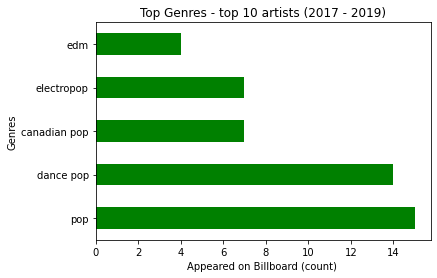

<Figure size 432x288 with 0 Axes>

In [143]:
top_art_gen.plot(kind = "barh", facecolor = "green", title = "Top Genres - Top 10 artists (2017 - 2019)") 
plt.xlabel("Appeared on Billboard (count) ")
plt.ylabel("Genres")
plt.savefig('data/top_gen_art.png')
plt.show()
plt.tight_layout()
